In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [3]:
# Load CSV
df = pd.read_csv("data.csv")

# Ensure the column is string type
df["document_content"] = df["document_content"].astype(str)


In [76]:
def find_word_occurences(word):
    pattern = re.compile(word, re.IGNORECASE)

    df["count"] = df["document_content"].apply(lambda x: len(pattern.findall(x)))

    # Total frequency across the whole dataset
    total_word_count = df["count"].sum()

    rows_with_word = df[df["count"] > 0]
    return rows_with_word, total_word_count

In [104]:
def show_frequence_bar_chart(rows_with_word, total_word_count, words):

    # Make a safe copy
    rows_with_word = rows_with_word.copy()

    # Ensure date column is datetime
    rows_with_word["Gestellt am"] = pd.to_datetime(rows_with_word["Gestellt am"], errors="coerce")

    # Create year-month column safely
    rows_with_word.loc[:, "year_month"] = rows_with_word["Gestellt am"].dt.to_period("M")

    # Count occurrences per month
    monthly_counts = rows_with_word.groupby("year_month").size()

    # Find full range of months in the entire dataframe
    all_months = pd.period_range(start=df["Gestellt am"].min().to_period("M"), end=df["Gestellt am"].max().to_period("M"), freq="M")

    monthly_counts = monthly_counts.reindex(all_months, fill_value=0)

    print("Total occurrences:", total_word_count)

    # Plot as bar graph
    monthly_counts.plot(kind="bar")
    plt.xlabel("Month")
    plt.ylabel(f"Frequency of {words}")
    plt.title(f"Monthly Frequency of {words} in documents")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [105]:
def find_words_frequence(words):
    dfs = []

    total_word_count = 0
    for word in words:
        rows_with_word,word_count = find_word_occurences(word)
        dfs.append(rows_with_word)
        total_word_count += word_count

    rows_all = pd.concat(dfs, ignore_index=True)
    rows_with_words = rows_all.drop_duplicates()
    return rows_with_words, total_word_count


Total occurrences: 106


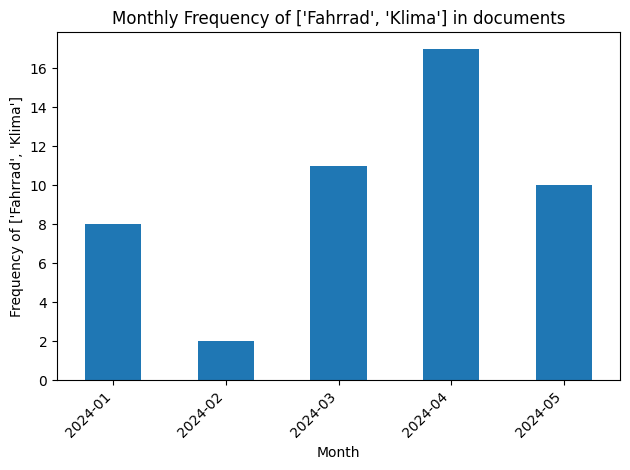

StR-Antrag 20-26 / A 04589 Zeitnahe Beseitigung der Frostaufbruchschäden auf Münchens Straßen 
StR-Antrag 20-26 / F 00882 Räder mit Sicherheitsmängeln – auch in München im Einsatz? 
StR-Antrag 20-26 / A 04681 Anschlussbereich östlich der äußeren Ludwigsbrücke - Zufahrt von
der Rosenheimer Straße zur Zell... 
StR-Antrag 20-26 / A 04724 Expressbus statt Tram-Nord: Planungen für Tram in der Heidemannstraße einstellen 
StR-Antrag 20-26 / A 04747 Werksviertel Bebauungsplan mit Grünordnung Nr. 2061 WA 2(1) und WA 2(2) 
In-House-Vergabe; 
WA ... 
StR-Antrag 20-26 / A 04785 Dringlichkeitsantrag zur Behandlung in der Vollversammlung am 24.04.2024
Klärung der Gesundheits... 
StR-Antrag 20-26 / A 04790 Bahnhofsplatz Pasing Nord für Umweltverbund priorisieren 
StR-Antrag 20-26 / A 04820 Eine vernünftige Verkehrsplanung für Pasing-Nord und das Neubaugebiet „Berduxstraße“ 
StR-Antrag 20-26 / A 04530 Die Münchner Quellen und Quellbäche besser schützen 
StR-Antrag 20-26 / A 04529 Grünflächen schützen:

In [107]:
words = ["Fahrrad", "Klima"]
rows_with_words, total_word_count = find_words_frequence(words)

show_frequence_bar_chart(rows_with_words, total_word_count, words)

for row in rows_with_words['name']:
    print(row, end = " ")
    print()

In [ ]:
1